/home/hiep/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


P(t= 0.1)= 0.64944774, x=40.50000000, f=0.64944805 ; e= 0.00000030, e%= 0.00004689
P(t= 0.2)= 0.65605847, x=41.00000000, f=0.65605903 ; e= 0.00000056, e%= 0.00008545
P(t= 0.3)= 0.66261929, x=41.50000000, f=0.66262005 ; e= 0.00000075, e%= 0.00011383
P(t= 0.4)= 0.66912973, x=42.00000000, f=0.66913061 ; e= 0.00000088, e%= 0.00013083
P(t= 0.5)= 0.67558929, x=42.50000000, f=0.67559021 ; e= 0.00000092, e%= 0.00013584
P(t= 0.6)= 0.68199748, x=43.00000000, f=0.68199836 ; e= 0.00000088, e%= 0.00012885
P(t= 0.7)= 0.68835382, x=43.50000000, f=0.68835458 ; e= 0.00000076, e%= 0.00011042
P(t= 0.8)= 0.69465780, x=44.00000000, f=0.69465837 ; e= 0.00000057, e%= 0.00008163
P(t= 0.9)= 0.70090896, x=44.50000000, f=0.70090926 ; e= 0.00000031, e%= 0.00004412


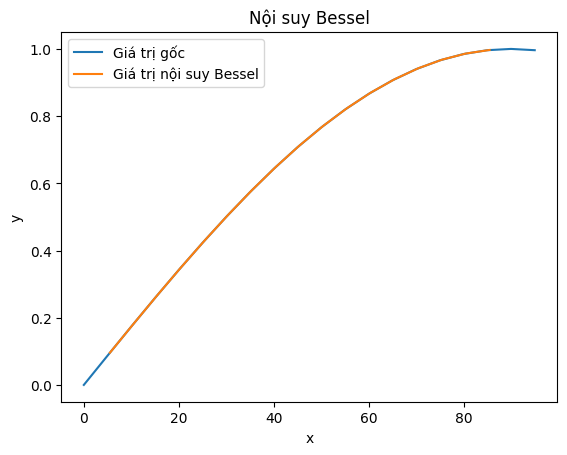

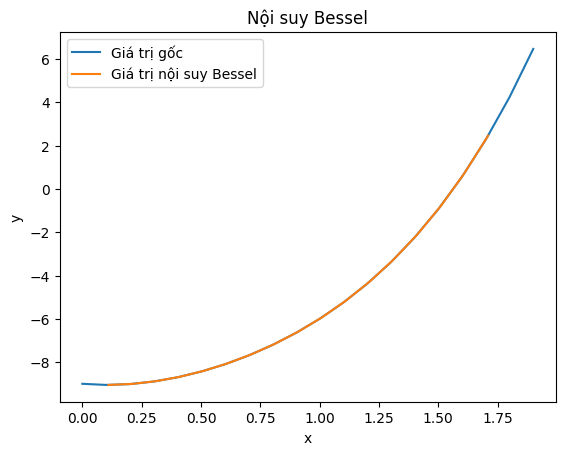

In [1]:
import array as arr
import math as mt
import numpy as np
import pandas as pd
import sp_tg_tren as sp_up
from NS_TrungTam_Bessel import P_Bessel 
from NS_TrungTam_Steclinh import P_Steclinh
from NS_NT_tien_CachDeu import P_NT_Tien_CD
from NS_NT_lui_CachDeu import P_NT_Lui_CD
import matplotlib.pyplot as plt
PI=mt.pi


xlsxFile1 = pd.read_excel('../Data/ham_luong_giac.xlsx',sheet_name="Sheet1", header=0)
xlsxFile1.rename(str.lower, axis='columns',inplace=1)
X_sin=xlsxFile1['x']
Y_sin=xlsxFile1['y']

xlsxFile2 = pd.read_excel('../Data/ham_da_thuc.xlsx',sheet_name="Sheet1", header=0)
xlsxFile2.rename(str.lower, axis='columns',inplace=1)
X_func=xlsxFile2['x']
Y_func=xlsxFile2['y']

def PL_Bessel(t,h,X,Y):
    N=len(X)
    # array cac gia tri can noi suy
    nX=np.copy(X+t*h)[1:N-2]
    # nY = np.zeros(N-1)
    n=(N-2)/2
    nY = arr.array('d',[])
    # load tung gia tri
    for i in range (0,N-3):
        x0i = nX[i] - t*h
        j = np.where(X == x0i)[0][0]
        de=1
        if j< (n+1):
            de = j
        else:
            de = 2*n-j
        li=int(j-de)
        ri=int(j+de+2)
        aX = np.copy(X[li:ri])
        aY = np.copy(Y[li:ri])
        pi=P_Bessel(t,aX,aY)
        nY.append(pi)
    plt.plot(X, Y, label='Giá trị gốc')
    plt.plot(nX, nY, label='Giá trị nội suy Bessel')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Nội suy Bessel')
    plt.legend()  # Hiển thị chú thích
    plt.show()

t=0.1
h=5
PL_Bessel(t, h, X_sin, Y_sin)
t=0.1
h=0.1
PL_Bessel(t, h, X_func, Y_func)



In [2]:
aT= arr.array('d',[])
aE1= arr.array('d',[])
# f=sin(x) /=/-----------------------------------------
# x0=40
# h=5
# X1=np.copy(X_sin[6:12] )#index = 6->11
# Y1=np.copy(Y_sin[6:12] )
#f = x^4-2x^3+5x^2-x-9 /=/-------------------------------------------
x0= 0.8
h=0.1
X1=np.copy(X_func[7:11] )#index =  6->11
Y1=np.copy(Y_func[7:11] )
for l in range(1,10):
    t=l/10
    x=x0+t*h
    # f=mt.sin(x*PI/180)
    f=pow(x,4)-2*pow(x,3)+5*pow(x,2)-x-9
    p=P_Bessel(t,X1,Y1)
    e=abs(f-p)
    ce=100*abs(e/f)
    aT.append(t)
    aE1.append(ce)
    # print("P(t= %2.1f)= %2.8f, x=%2.8f, f=%2.8f ; e= %2.8f, e%%= %2.8f"%(t,p,x,f,e,ce))

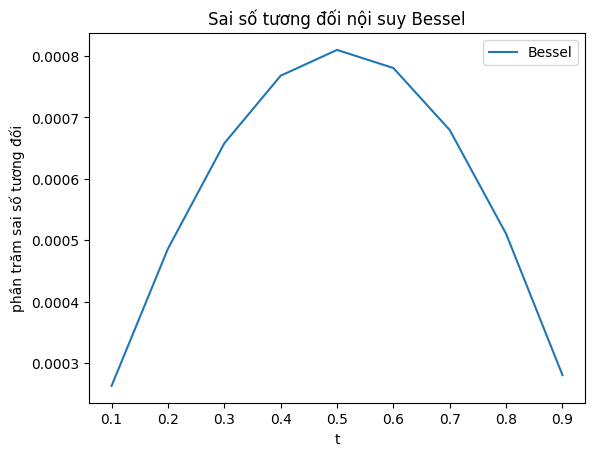

In [3]:
plt.plot(aT, aE1, label='Bessel')

plt.xlabel('t')
plt.ylabel('phần trăm sai số tương đối')
plt.title('Sai số tương đối nội suy Bessel')
plt.legend()  # Hiển thị chú thích
plt.show()

In [4]:
aT= arr.array('d',[])
aE2= arr.array('d',[])
# f=sin(x) /=/-----------------------------------------
# x0=40
# h=5
# X1=np.copy(X_sin[5:12] )#index = 0 --> 19 /6->11
# Y1=np.copy(Y_sin[5:12] )
#f = x^4-2x^3+5x^2-x-9 /=/-------------------------------------------
x0= 0.8
h=0.1
X1=np.copy(X_func[6:11] )# 7 moc
Y1=np.copy(Y_func[6:11] )

for l in range(1,10):
    t=l/10
    x=x0+t*h
    # f=mt.sin(x*PI/180)
    f=pow(x,4)-2*pow(x,3)+5*pow(x,2)-x-9
    p=P_Steclinh(t,X1,Y1)
    e=abs(f-p)
    ce=100*abs(e/f)
    aT.append(t)
    aE2.append(ce)
    # print("P(t= %2.1f)= %2.8f, x=%2.8f, f=%2.8f ; e= %2.8f, e%%= %2.8f"%(t,p,x,f,e,ce))


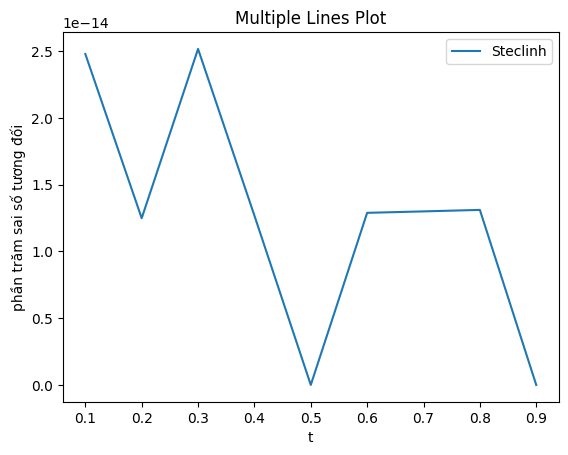

In [5]:

plt.plot(aT, aE2, label='Steclinh')

plt.xlabel('t')
plt.ylabel('phần trăm sai số tương đối')
plt.title('Multiple Lines Plot')
plt.legend()  # Hiển thị chú thích
plt.show()


In [6]:
aT= arr.array('d',[])
aE3= arr.array('d',[])
# # f=sin(x) /=/-----------------------------------------
# x0=40
# h=5
# X1=np.copy(X_sin[8:14] )#index = 0 --> 19 /6->11
# Y1=np.copy(Y_sin[8:14] )
#f = x^4-2x^3+5x^2-x-9 /=/-------------------------------------------
x0= 0.8
h=0.1
X1=np.copy(X_func[8:12] )# 7 moc
Y1=np.copy(Y_func[8:12] )
for l in range(1,10):
    t=l/10
    x=x0+t*h
    # f=mt.sin(x*PI/180)
    f=pow(x,4)-2*pow(x,3)+5*pow(x,2)-x-9
    p=P_NT_Tien_CD(t,X1,Y1)
    e=abs(f-p)
    ce=100*abs(e/f)
    aT.append(t)
    aE3.append(ce)
    # print("P(t= %2.1f)= %2.8f, x=%2.8f, f=%2.8f ; e= %2.8f, e%%= %2.8f"%(t,p,x,f,e,ce))



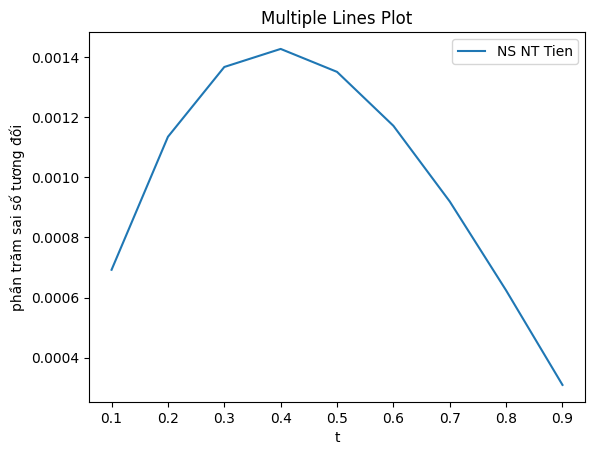

In [7]:
plt.plot(aT, aE3, label='NS NT Tien')

plt.xlabel('t')
plt.ylabel('phần trăm sai số tương đối')
plt.title('Multiple Lines Plot')
plt.legend()  # Hiển thị chú thích
plt.show()


In [8]:

aT= arr.array('d',[])
aE4= arr.array('d',[])
# f=sin(x) /=/-----------------------------------------
# x0=45
# h=5
# X1=X_sin[4:10] #index = 0 --> 19 /7->11
# Y1=Y_sin[4:10]
#f = x^4-2x^3+5x^2-x-9 /=/-------------------------------------------
x0= 0.9
h=0.1
X1=np.copy(X_func[6:10] )# 6 moc
Y1=np.copy(Y_func[6:10] )
for l in range(1,10):
    t=-l/10
    x=x0+t*h
    f=mt.sin(x*PI/180)
    f=pow(x,4)-2*pow(x,3)+5*pow(x,2)-x-9
    p=P_NT_Lui_CD(t,X1,Y1)
    e=abs(f-p)
    ce=100*abs(e/f)
    aT.append(abs(t))
    aE4.append(ce)
    # print("P(t= %2.1f)= %2.8f, x=%2.8f, f=%2.8f ; e= %2.8f, e%%= %2.8f"%(t,p,x,f,e,ce))



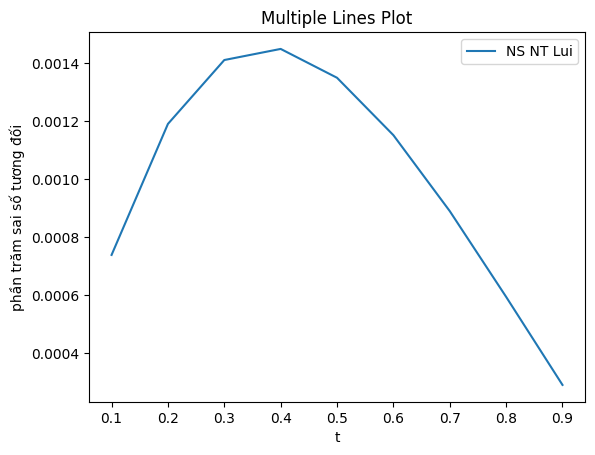

In [9]:
plt.plot(aT, aE4, label='NS NT Lui')

plt.xlabel('t')
plt.ylabel('phần trăm sai số tương đối')
plt.title('Multiple Lines Plot')
plt.legend()  # Hiển thị chú thích
plt.show()

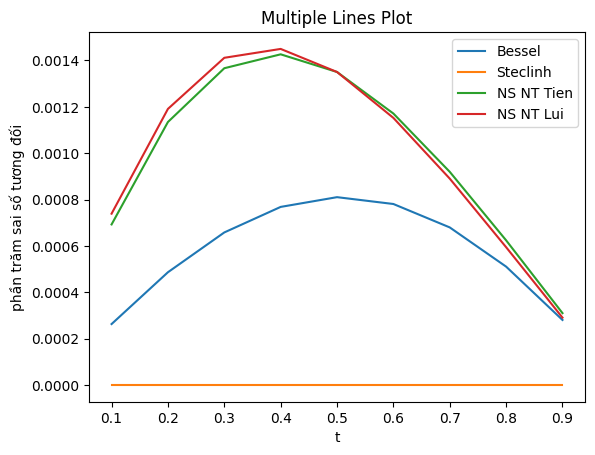

In [10]:
plt.plot(aT, aE1, label='Bessel')
plt.plot(aT, aE2, label='Steclinh')
plt.plot(aT, aE3, label='NS NT Tien')
plt.plot(aT, aE4, label='NS NT Lui')

plt.xlabel('t')
plt.ylabel('phần trăm sai số tương đối')
plt.title('Multiple Lines Plot')
plt.legend()  # Hiển thị chú thích
plt.show()

